In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns


In [2]:
from sklearn.datasets import load_wine

In [3]:
x =load_wine()
wine_df = x['data']
wine_class=x['target']
df1= pd.DataFrame(wine_df,columns=x['feature_names'])
df2= pd.DataFrame(wine_class,columns=['class'])

In [4]:
df = pd.concat([df1,df2],axis=1)

In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


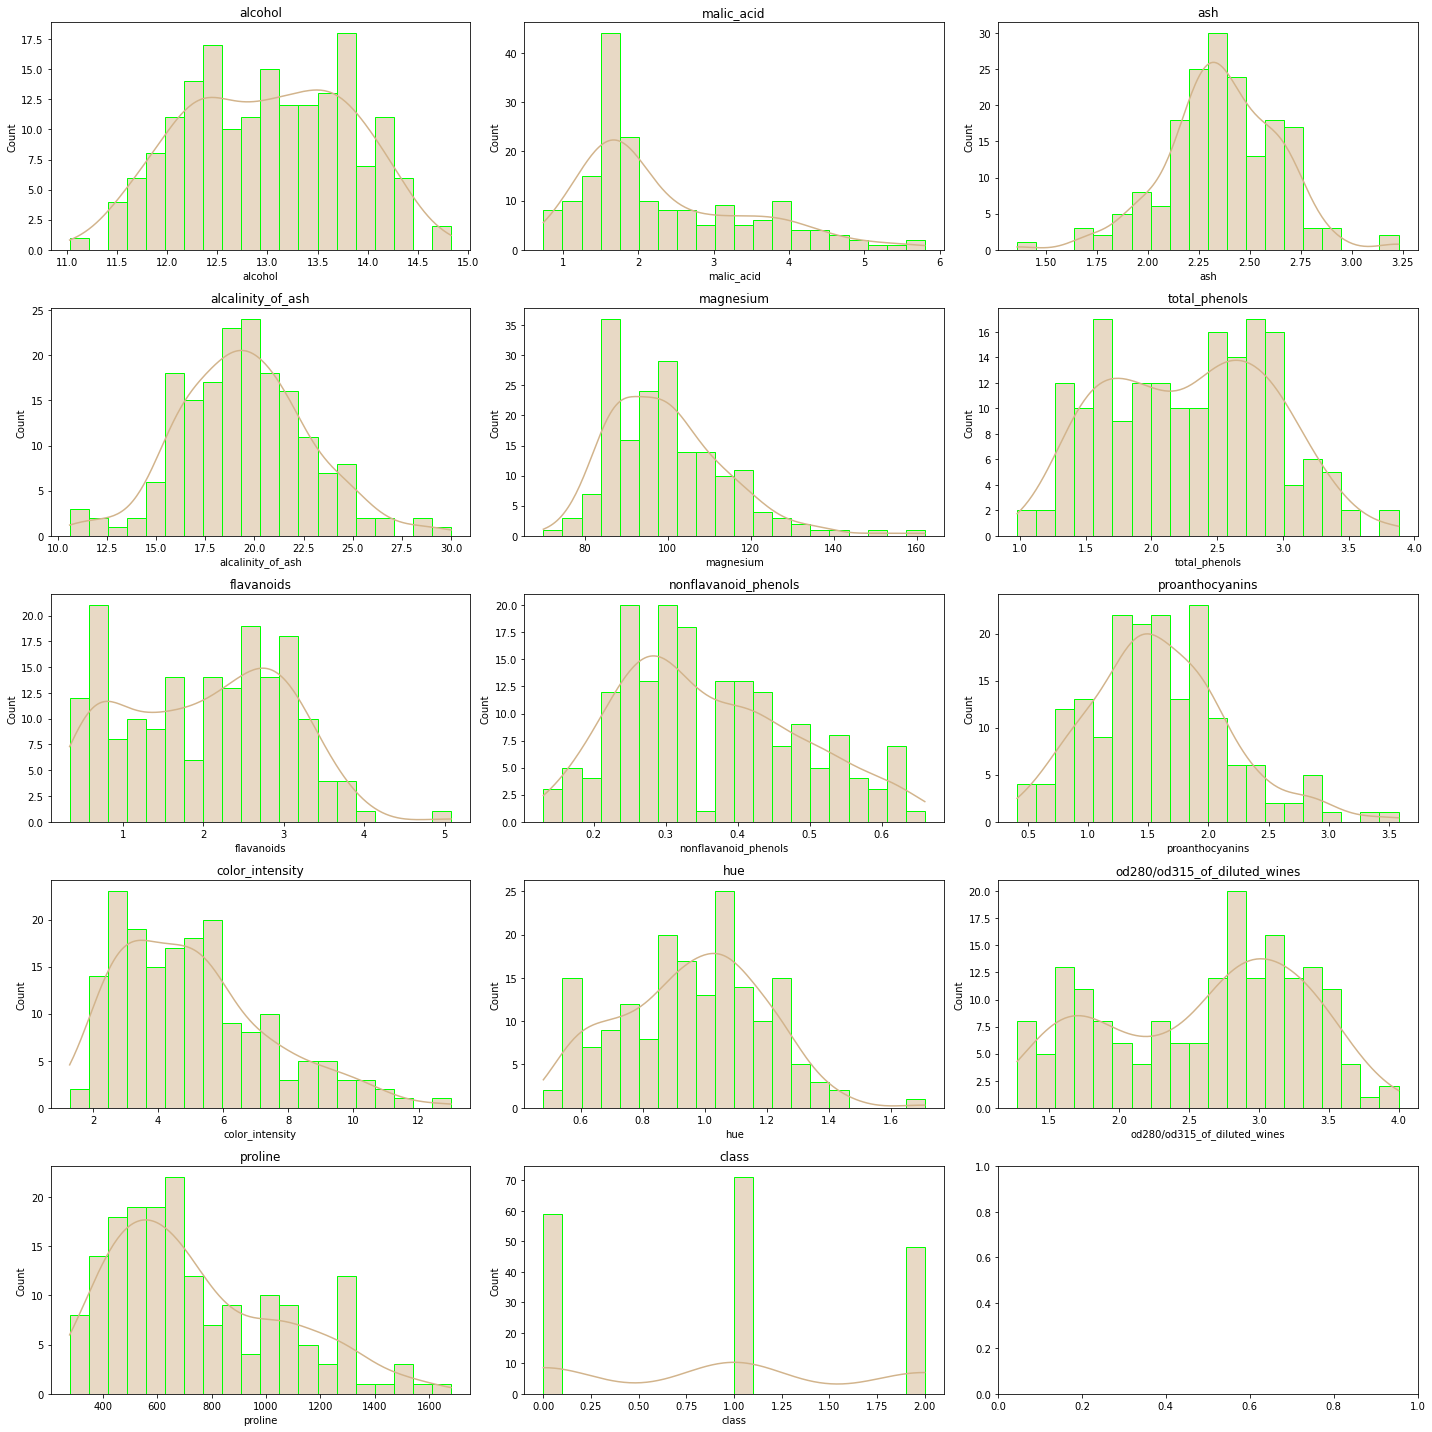

In [6]:
numerics=['int16','int32','int64','float16','float32','float64']
con_df=df.select_dtypes(include=numerics)
con_cols=con_df.columns
num_cols=3
n_bins=20
num_rows=int(len(con_cols)/num_cols)+1

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,20))

for col ,ax in zip(con_cols,axes.flatten()[:len(con_cols)]):
    sns.histplot(con_df[col],bins=n_bins,kde=True,ax=ax,color='tan',edgecolor='lime')
    ax.set_title(col)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
df1=df.copy()
df= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944


In [9]:
x['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# TASK3

In [10]:
X=df1
cols = x['feature_names']
def make_kmeans(attributes=cols, scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=3, show='features'):
    attributes = list(attributes)
    scaled_values = scaler.fit_transform(df1)
    X_l=X.iloc[:, 0:13].values
    y_l=X.iloc[:, 13].values

    components = min(components, len(cols))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'lda':
        values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
    else:
        values = scaled_values

    cluster = KMeans(n_clusters=k).fit_predict(values)

    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)

    df_plot['cluster'] = cluster

    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans, attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),
                                                            description='Features', layout=layout, style=style,
                                                            disabled=False,continuous_update=False,orientation='horizontal',
                                                            readout=True),
             scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))],
                                         description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True),
              dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)],
                                                       description='Dimensionality Reduction', layout=layout, style=style,
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
             components=widgets.SelectionSlider(options=range(1, 5), value=4,description='PCA components',
                                                layout=layout, style=style,
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True),
             k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,
                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
              show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show',
                                        layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True))



interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

# TASK4

In [11]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def f(dimension_reduction='pca',components=2):
    scaled_values = scaler.fit_transform(df1)
    X_l=df1.iloc[:, 0:13].values
    y_l=df1.iloc[:, 13].values
    components = min(components, len(cols))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    values = pd.DataFrame(values)
    X=values
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    X = np.array(X)
    plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
    plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan')
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta')
    plt.title('Clusters')
    plt.xlabel('Price_in_thousands')
    plt.ylabel('Power_perf_factor')
    plt.show()

interactive_plot = interactive(f, dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),  ('without', None)],
                                                       description='Dimensionality Reduction', layout=layout, style=style,
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
                              components=widgets.SelectionSlider(options=range(2, 13), value=12,description='PCA components',
                                                layout=layout, style=style,
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(RadioButtons(description='Dimensionality Reduction', layout=Layout(width='400px'), optio…

# TASK5

In [12]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def f(F1,F2,dimension_reduction='pca',components=2):
    scaled_values = scaler.fit_transform(df1)
    X_l=df1.iloc[:, 0:13].values
    y_l=df1.iloc[:, 13].values
    components = min(components, len(cols))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    values = pd.DataFrame(values)
    dbscan_opt=DBSCAN(eps=4, min_samples=4)
    dbscan_opt.fit(values)
    values['DBSCAN_opt_labels']=dbscan_opt.labels_
    
    
    dbscan_opt=DBSCAN(eps=4, min_samples=4)
    dbscan_opt.fit(values)
    values['DBSCAN_opt_labels']=dbscan_opt.labels_
    colors=['purple','red','blue','green']

    plt.figure(figsize=(15,7))

    plt.scatter(values.iloc[:,F1],values.iloc[:,F2], c=values['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    plt.show()
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']))

interactive_plot = interactive(f, F1=(0, 12,1), F2=(0, 12, 1),    dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'),  ('without', None)],
                                                       description='Dimensionality Reduction', layout=layout, style=style,
                                                       disabled=False,continuous_update=False,orientation='horizontal',readout=True),
                              components=widgets.SelectionSlider(options=range(1, 13), value=12,description='PCA components',
                                                layout=layout, style=style,
                                                disabled=False,continuous_update=False,orientation='horizontal',readout=True))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=6, description='F1', max=12), IntSlider(value=6, description='F2', max=1…